In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'

In [3]:
FILE_NAME = '/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/results_1.000/reconstruction/mouse_cerebellar_cortex_1.000.hdf5'

In [4]:
cells_positions = pd.read_csv('/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/cell_positions.csv')

In [5]:
cells_positions.head()

,x,y,z,cell_type,cell_id
0,75.622307,9.909550,137.5,purkinje_cell,1
1,33.403757,22.655929,137.5,purkinje_cell,2
2,69.794482,30.924364,137.5,purkinje_cell,3
3,12.575932,44.695208,137.5,purkinje_cell,4
4,48.966657,50.266964,137.5,purkinje_cell,5


In [6]:
pc_df = cells_positions[cells_positions['cell_type'] == 'purkinje_cell'].copy()
pc_positions = pc_df[['x', 'y', 'z']].values
pc_actual_ids = pc_df['cell_id'].values 
pc_indices = pc_df.index.values  


Connectivity chunk "0" → synapses targeting Purkinje cells in chunk "0"
Connectivity chunk "1" → synapses targeting Purkinje cells in chunk "1"

In [7]:
def extract_connectivity_with_chunk_mapping(h5_file, connection_types):
    """
    Extract connectivity data using chunk IDs as cell identifiers
    """
    connectivity = {}
    
    with h5py.File(h5_file, 'r') as f:
        for conn_type in connection_types:
            conn_path = f'connectivity/{conn_type}'
            if conn_path in f:
                conn_group = f[conn_path]
                connectivity[conn_type] = {
                    'chunk_to_synapses': {},
                    'all_global_locs': [],
                    'all_local_locs': [],
                    'chunk_ids': []
                }
                
                print(f"\nExploring {conn_type} with chunk mapping:")
                
                if 'inc' in conn_group:
                    inc_group = conn_group['inc']
                    for chunk_id in inc_group.keys():
                        chunk = inc_group[chunk_id]
                        
                        # all synapses in a chunk target the same postsynaptic cell
                        global_coords = chunk['global_locs'][:] # synapse locations
                        local_coords = chunk['local_locs'][:] # relative locations to postsynaptic cell

                        # Store by chunk ID (likely cell ID)
                        connectivity[conn_type]['chunk_to_synapses'][chunk_id] = {
                            'global_locs': global_coords,
                            'local_locs': local_coords,
                            'n_synapses': len(global_coords)
                        }
                        
                        connectivity[conn_type]['all_global_locs'].append(global_coords)
                        connectivity[conn_type]['all_local_locs'].append(local_coords)
                        connectivity[conn_type]['chunk_ids'].extend([chunk_id] * len(global_coords))
                        
                        print(f"  Chunk {chunk_id}: {len(global_coords)} synapses")
                        print(f"    Global coords sample: {global_coords[:2] if len(global_coords) > 0 else 'none'}")
                        print(f"    Local coords sample: {local_coords[:2] if len(local_coords) > 0 else 'none'}")
    
    for conn_type in connectivity:
        if connectivity[conn_type]['all_global_locs']:
            connectivity[conn_type]['all_global_locs'] = np.vstack(connectivity[conn_type]['all_global_locs'])
            connectivity[conn_type]['all_local_locs'] = np.vstack(connectivity[conn_type]['all_local_locs'])
            connectivity[conn_type]['chunk_ids'] = np.array(connectivity[conn_type]['chunk_ids'])
        else:
            connectivity[conn_type]['all_global_locs'] = np.array([]).reshape(0, 3)
            connectivity[conn_type]['all_local_locs'] = np.array([]).reshape(0, 3)
            connectivity[conn_type]['chunk_ids'] = np.array([])
    
    return connectivity

In [8]:
connectivity_chunks = extract_connectivity_with_chunk_mapping(FILE_NAME, 
                                                            ['stellate_to_purkinje', 'basket_to_purkinje', 
                                                             'ascending_axon_to_purkinje', 'parallel_fiber_to_purkinje'])


Exploring stellate_to_purkinje with chunk mapping:
  Chunk 4294967296: 538 synapses
    Global coords sample: [[  1 107  79]
 [  1 108   3]]
    Local coords sample: [[  7 421  20]
 [  7 151   6]]
  Chunk 4294967297: 637 synapses
    Global coords sample: [[ 22 113  25]
 [ 22 114  35]]
    Local coords sample: [[ 0 60  1]
 [ 0 55  6]]
  Chunk 4294967298: 457 synapses
    Global coords sample: [[  0 115   1]
 [  0 115   8]]
    Local coords sample: [[  3 284   6]
 [  3 268   4]]
  Chunk 4295032832: 384 synapses
    Global coords sample: [[  0 117   8]
 [  0 117  15]]
    Local coords sample: [[  0 354   7]
 [  0 325   3]]
  Chunk 4295032833: 583 synapses
    Global coords sample: [[  2 113  30]
 [  2 119   5]]
    Local coords sample: [[  3 134   0]
 [  3 134   6]]
  Chunk 4295032834: 453 synapses
    Global coords sample: [[  2 107  56]
 [  2 111  18]]
    Local coords sample: [[  3 254   0]
 [  3 283   2]]

Exploring basket_to_purkinje with chunk mapping:
  Chunk 4294967296: 116 syna

In [9]:
connectivity_mf_glom = extract_connectivity_with_chunk_mapping(FILE_NAME, ['mossy_fibers_to_glomerulus', 'glomerulus_to_granule'])


Exploring mossy_fibers_to_glomerulus with chunk mapping:
  Chunk 0: 297 synapses
    Global coords sample: [[ 4 -1 -1]
 [ 5 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 2 -1 -1]]
  Chunk 1: 300 synapses
    Global coords sample: [[ 5 -1 -1]
 [ 4 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 1 -1 -1]]
  Chunk 2: 300 synapses
    Global coords sample: [[ 5 -1 -1]
 [13 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 1 -1 -1]]
  Chunk 4294967296: 90 synapses
    Global coords sample: [[ 4 -1 -1]
 [12 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 1 -1 -1]]
  Chunk 4294967297: 90 synapses
    Global coords sample: [[11 -1 -1]
 [ 9 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 7 -1 -1]]
  Chunk 4294967298: 90 synapses
    Global coords sample: [[ 7 -1 -1]
 [ 5 -1 -1]]
    Local coords sample: [[ 1 -1 -1]
 [ 3 -1 -1]]
  Chunk 4295032832: 90 synapses
    Global coords sample: [[10 -1 -1]
 [ 4 -1 -1]]
    Local coords sample: [[ 0 -1 -1]
 [ 2 -1 -1]]
  Chunk 4295032833: 90 synapses
   

In [10]:
def get_purkinje_cell_ids(h5_file):
    """
    Get Purkinje cell IDs from placement data
    """
    pc_info = {}
    
    with h5py.File(h5_file, 'r') as f:
        placement_path = f'placement/purkinje_cell'
        if placement_path in f:
            pc_group = f[placement_path]
            
            for chunk_id in pc_group.keys():
                print(chunk_id)
                chunk = pc_group[chunk_id]
                if 'position' in chunk:
                    positions = chunk['position'][:]
                    pc_info[chunk_id] = {
                        'positions': positions,
                        'n_cells': len(positions)
                    }
                    print(f"  Chunk {chunk_id}: {len(positions)} cells")
                    print(f"    Position sample: {positions[0] if len(positions) > 0 else 'none'}")
    
    return pc_info

pc_info = get_purkinje_cell_ids(FILE_NAME)

4294967296
  Chunk 4294967296: 11 cells
    Position sample: [ 75.62230667   9.90954999 137.5       ]
4294967297
  Chunk 4294967297: 12 cells
    Position sample: [112.01303168  18.42343359 137.5       ]
4294967298
  Chunk 4294967298: 10 cells
    Position sample: [205.62230667   9.20058444 137.5       ]
4295032832
  Chunk 4295032832: 11 cells
    Position sample: [ 37.87390682 115.04089742 137.5       ]
4295032833
  Chunk 4295032833: 12 cells
    Position sample: [131.48318181 107.22837824 137.5       ]
4295032834
  Chunk 4295032834: 12 cells
    Position sample: [210.0924568 100.5792494 137.5      ]


In [11]:
def plot_per_cell_density(pc_positions, pc_actual_ids, synapse_counts, synapse_details, show_ids=True):
    """
    Enhanced version with better ID positioning and styling
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=300)
    
    # Data for each plot
    plot_data = [
        (synapse_counts, 'viridis', 'Total Synapses per Purkinje Cell', 'Total Synapses'),
        ([synapse_details[i]['stellate'] for i in range(len(pc_positions))], 
         'Blues', 'Stellate→PC Synapses per Cell', 'Stellate Synapses'),
        ([synapse_details[i]['basket'] for i in range(len(pc_positions))], 
         'Reds', 'Basket→PC Synapses per Cell', 'Basket Synapses'),
        ([synapse_details[i]['ascending'] for i in range(len(pc_positions))], 
         'Greens', 'Ascending→PC Synapses per Cell', 'Ascending Synapses'),
        ([synapse_details[i]['parallel'] for i in range(len(pc_positions))], 
         'Purples', 'Parallel→PC Synapses per Cell', 'Parallel Synapses')
    ]
    
    for idx, (counts, cmap, title, label) in enumerate(plot_data):
        ax = axes[idx]
        
        # Create scatter plot
        scatter = ax.scatter(pc_positions[:, 0], pc_positions[:, 1], 
                           c=counts, s=100, cmap=cmap,
                           edgecolors='black', linewidth=0.8, alpha=0.8)
        
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('X Position (μm)', fontsize=12)
        if idx == 0:  # Only leftmost plot gets y-label
            ax.set_ylabel('Y Position (μm)', fontsize=12)
        
        # Colorbar
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
        cbar.set_label(label, fontsize=10)
        
        # Add cell IDs with smart positioning
        if show_ids:
            for i, (pos, cell_id) in enumerate(zip(pc_positions, pc_actual_ids)):
                # Use white text with black outline for better visibility
                ax.annotate(f'{cell_id}', (pos[0], pos[1]), 
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=7, fontweight='bold', 
                           color='black', ha='left', va='bottom')
        
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-10, 310) 
        ax.set_ylim(-10, 210)
    
    plt.tight_layout()
    plt.show()


In [45]:
def plot_per_cell_density(pc_positions, pc_actual_ids, synapse_counts, synapse_details, show_ids=True):
    weights = {
        'basket': 0.44,      
        'stellate': 0.17,
        'ascending': 0.2,    
        'parallel': 0.05     
    }
    weighted_inhibitory = []
    weighted_excitatory = []
    weighted_total = []
    total_excitatory = []
    total_inhibitory = []
    
    for i in range(len(pc_positions)):
        inhib = (synapse_details[i]['basket'] * weights['basket'] + 
                synapse_details[i]['stellate'] * weights['stellate'])
        
        excit = (synapse_details[i]['ascending'] * weights['ascending'] + 
                synapse_details[i]['parallel'] * weights['parallel'])
        
        excit_total = synapse_details[i]['ascending'] + synapse_details[i]['parallel']
        
        inhib_total = synapse_details[i]['basket'] + synapse_details[i]['stellate']
        
        total_weighted = inhib + excit
        
        weighted_inhibitory.append(inhib)
        weighted_excitatory.append(excit)
        weighted_total.append(total_weighted)
        total_excitatory.append(excit_total)
        total_inhibitory.append(inhib_total)
    
    fig = plt.figure(figsize=(8.27, 10), dpi=300)
    
    # Create GridSpec with 2 rows, 2 columns
    gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3, top=0.9)
    
    # Top row: Total inhibitory (left) and Total excitatory (right)
    ax1 = fig.add_subplot(gs[0, 0])  # Total inhibitory
    ax2 = fig.add_subplot(gs[0, 1])  # Total excitatory
    
    # Bottom row: Weighted total (centered, spanning both columns)
    ax3 = fig.add_subplot(gs[1, :])  # Weighted total
    
    # Data for the three plots
    plot_data = [
        (total_inhibitory, 'Purples', 'Total Inhibitory Synapses per PC', 'Inhibitory Synapses', ax1),
        (total_excitatory, 'Greens', 'Total Excitatory Synapses per PC', 'Excitatory Synapses', ax2),
        (weighted_total, 'viridis', 'Weighted Total Synaptic Input', 'Weighted Total Input', ax3)
    ]
    
    for idx, (counts, cmap, title, label, ax) in enumerate(plot_data):
        scatter = ax.scatter(pc_positions[:, 0], pc_positions[:, 1], 
                           c=counts, s=40, cmap=cmap,
                           edgecolors='black', linewidth=0.8, alpha=0.8)
        
        ax.set_title(title, fontsize=10)
        ax.set_xlabel('X Position (μm)', fontsize=9)
        
        # Only first plot in each row gets y-label
        if idx == 0 or idx == 2:
            ax.set_ylabel('Y Position (μm)', fontsize=9)
        
        # Colorbar
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
        cbar.set_label(label, fontsize=8)
        cbar.ax.tick_params(labelsize=7)
        
        # Add cell IDs
        if show_ids:
            for i, (pos, cell_id) in enumerate(zip(pc_positions, pc_actual_ids)):
                ax.annotate(f'{cell_id}', (pos[0], pos[1]), 
                           xytext=(3, 3), textcoords='offset points',
                           fontsize=5, fontweight='bold', 
                           color='black', ha='left', va='bottom')
        
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-10, 310) 
        ax.set_ylim(-10, 210)
        ax.tick_params(axis='both', labelsize=8)
    
    # Add panel labels
    ax1.text(-0.18, 1.05, '(a)', transform=ax1.transAxes, fontsize=10)
    ax2.text(-0.18, 1.05, '(b)', transform=ax2.transAxes, fontsize=10)
    ax3.text(0.01, 1.05, '(c)', transform=ax3.transAxes, fontsize=10)
    
    fig.suptitle('Synaptic Input Distribution across Purkinje Cells', fontsize=12, y=0.96)

    weight_text = (f"Synaptic Weights: Basket={weights['basket']}, Stellate={weights['stellate']}, "
                  f"Ascending={weights['ascending']}, Parallel={weights['parallel']}")
    fig.text(0.5, 0.02, weight_text, ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08)
    plt.show()
    
    print("\nSynaptic Input Summary:")
    print(f"Total Inhibitory Synapses - Mean: {np.mean(total_inhibitory):.1f}, Range: {np.min(total_inhibitory):.1f}-{np.max(total_inhibitory):.1f}")
    print(f"Total Excitatory Synapses - Mean: {np.mean(total_excitatory):.1f}, Range: {np.min(total_excitatory):.1f}-{np.max(total_excitatory):.1f}")
    print(f"Weighted Total Input - Mean: {np.mean(weighted_total):.1f}, Range: {np.min(weighted_total):.1f}-{np.max(weighted_total):.1f}")
    
    return weighted_inhibitory, weighted_excitatory, weighted_total, total_excitatory, total_inhibitory

In [13]:
def calculate_synaptic_density(connectivity_chunks, pc_info):
    """
    Calculate synaptic density with proper chunk-to-cell mapping
    """
    print(f"PC chunks: {list(pc_info.keys())}")
    
    stellate_chunks = set(connectivity_chunks.get('stellate_to_purkinje', {}).get('chunk_to_synapses', {}).keys())
    basket_chunks = set(connectivity_chunks.get('basket_to_purkinje', {}).get('chunk_to_synapses', {}).keys())
    
    print(f"Stellate connectivity chunks: {sorted(stellate_chunks)}")
    print(f"Basket connectivity chunks: {sorted(basket_chunks)}")
    print(f"PC chunks with no stellate connections: {set(pc_info.keys()) - stellate_chunks}")
    print(f"PC chunks with no basket connections: {set(pc_info.keys()) - basket_chunks}")
    
    # Build cell mapping
    pc_positions_dict = {}
    cell_idx = 0
    chunk_to_cell_idx = {}
    
    for chunk_id in sorted(pc_info.keys()):
        positions = pc_info[chunk_id]['positions']
        n_cells = len(positions)
        chunk_to_cell_idx[chunk_id] = list(range(cell_idx, cell_idx + n_cells))
        
        for i, pos in enumerate(positions):
            pc_positions_dict[cell_idx + i] = {
                'position': pos,
                'chunk_id': chunk_id,
                'local_idx': i
            }
        cell_idx += n_cells
    
    n_pc = len(pc_positions_dict)
    synapse_counts = np.zeros(n_pc)
    synapse_details = {i: {'stellate': 0, 'basket': 0, 'ascending': 0, 'parallel': 0} for i in range(n_pc)}

    print(f"\nFound {n_pc} Purkinje cells across {len(pc_info)} chunks")
    
    for conn_type in ['stellate_to_purkinje', 'basket_to_purkinje', 'ascending_axon_to_purkinje', 'parallel_fiber_to_purkinje']:
        if conn_type not in connectivity_chunks:
            print(f"\n{conn_type}: NOT FOUND")
            continue
            
        cell_type = conn_type.split('_')[0]
        chunk_data = connectivity_chunks[conn_type]['chunk_to_synapses']
        
        print(f"\n{conn_type}:")
        total_synapses = 0
        assigned_synapses = 0
        
        for chunk_id, data in chunk_data.items():
            n_synapses = data['n_synapses']
            total_synapses += n_synapses
            
            if chunk_id in chunk_to_cell_idx:
                pc_cells_in_chunk = chunk_to_cell_idx[chunk_id]
                n_cells_in_chunk = len(pc_cells_in_chunk)
                
                # Equal distribution among cells in chunk
                # This assumes synapses are meant to be distributed among all PCs in the chunk
                if n_synapses > 0:
                    synapses_per_cell = n_synapses // n_cells_in_chunk
                    remainder = n_synapses % n_cells_in_chunk
                    
                    for i, pc_idx in enumerate(pc_cells_in_chunk):
                        # Distribute base amount
                        cell_synapses = synapses_per_cell
                        # Add remainder to first cells
                        if i < remainder:
                            cell_synapses += 1
                            
                        synapse_counts[pc_idx] += cell_synapses
                        synapse_details[pc_idx][cell_type] += cell_synapses
                        assigned_synapses += cell_synapses
                
                print(f"    Chunk {chunk_id}: {n_synapses} synapses → {n_cells_in_chunk} PC cells")
                print(f"      Distribution: {[synapse_details[idx][cell_type] for idx in pc_cells_in_chunk]}")
            else:
                print(f"    Chunk {chunk_id}: {n_synapses} synapses → NO MATCHING PC CHUNK")
        
        print(f"  Total synapses: {total_synapses}")
        print(f"  Assigned synapses: {assigned_synapses}")
        print(f"  Unassigned: {total_synapses - assigned_synapses}")
    
    return synapse_counts, synapse_details, pc_positions_dict

In [14]:
synapse_counts, synapse_details, pc_pos_dict = calculate_synaptic_density(
    connectivity_chunks, pc_info)

print(f"Total synapses: {synapse_counts.sum()}")
print(f"Average per PC: {synapse_counts.mean():.1f}")
print(f"Range: {synapse_counts.min():.0f} - {synapse_counts.max():.0f}")
print(f"Cells with >0 synapses: {np.sum(synapse_counts > 0)}/{len(synapse_counts)}")


pc_positions_realistic = np.array([pc_pos_dict[i]['position'] for i in range(len(pc_pos_dict))])
pc_actual_ids = cells_positions[cells_positions['cell_type'] == 'purkinje_cell']['cell_id'].values
# plot_per_cell_density(pc_positions_realistic, pc_actual_ids, synapse_counts, synapse_details, show_ids=True)

PC chunks: ['4294967296', '4294967297', '4294967298', '4295032832', '4295032833', '4295032834']
Stellate connectivity chunks: ['4294967296', '4294967297', '4294967298', '4295032832', '4295032833', '4295032834']
Basket connectivity chunks: ['4294967296', '4294967297', '4294967298', '4295032832', '4295032833', '4295032834']
PC chunks with no stellate connections: set()
PC chunks with no basket connections: set()

Found 68 Purkinje cells across 6 chunks

stellate_to_purkinje:
    Chunk 4294967296: 538 synapses → 11 PC cells
      Distribution: [49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48]
    Chunk 4294967297: 637 synapses → 12 PC cells
      Distribution: [54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53]
    Chunk 4294967298: 457 synapses → 10 PC cells
      Distribution: [46, 46, 46, 46, 46, 46, 46, 45, 45, 45]
    Chunk 4295032832: 384 synapses → 11 PC cells
      Distribution: [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34]
    Chunk 4295032833: 583 synapses → 12 PC cells
      Distributio

/tmp/ipykernel_37388/701919578.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


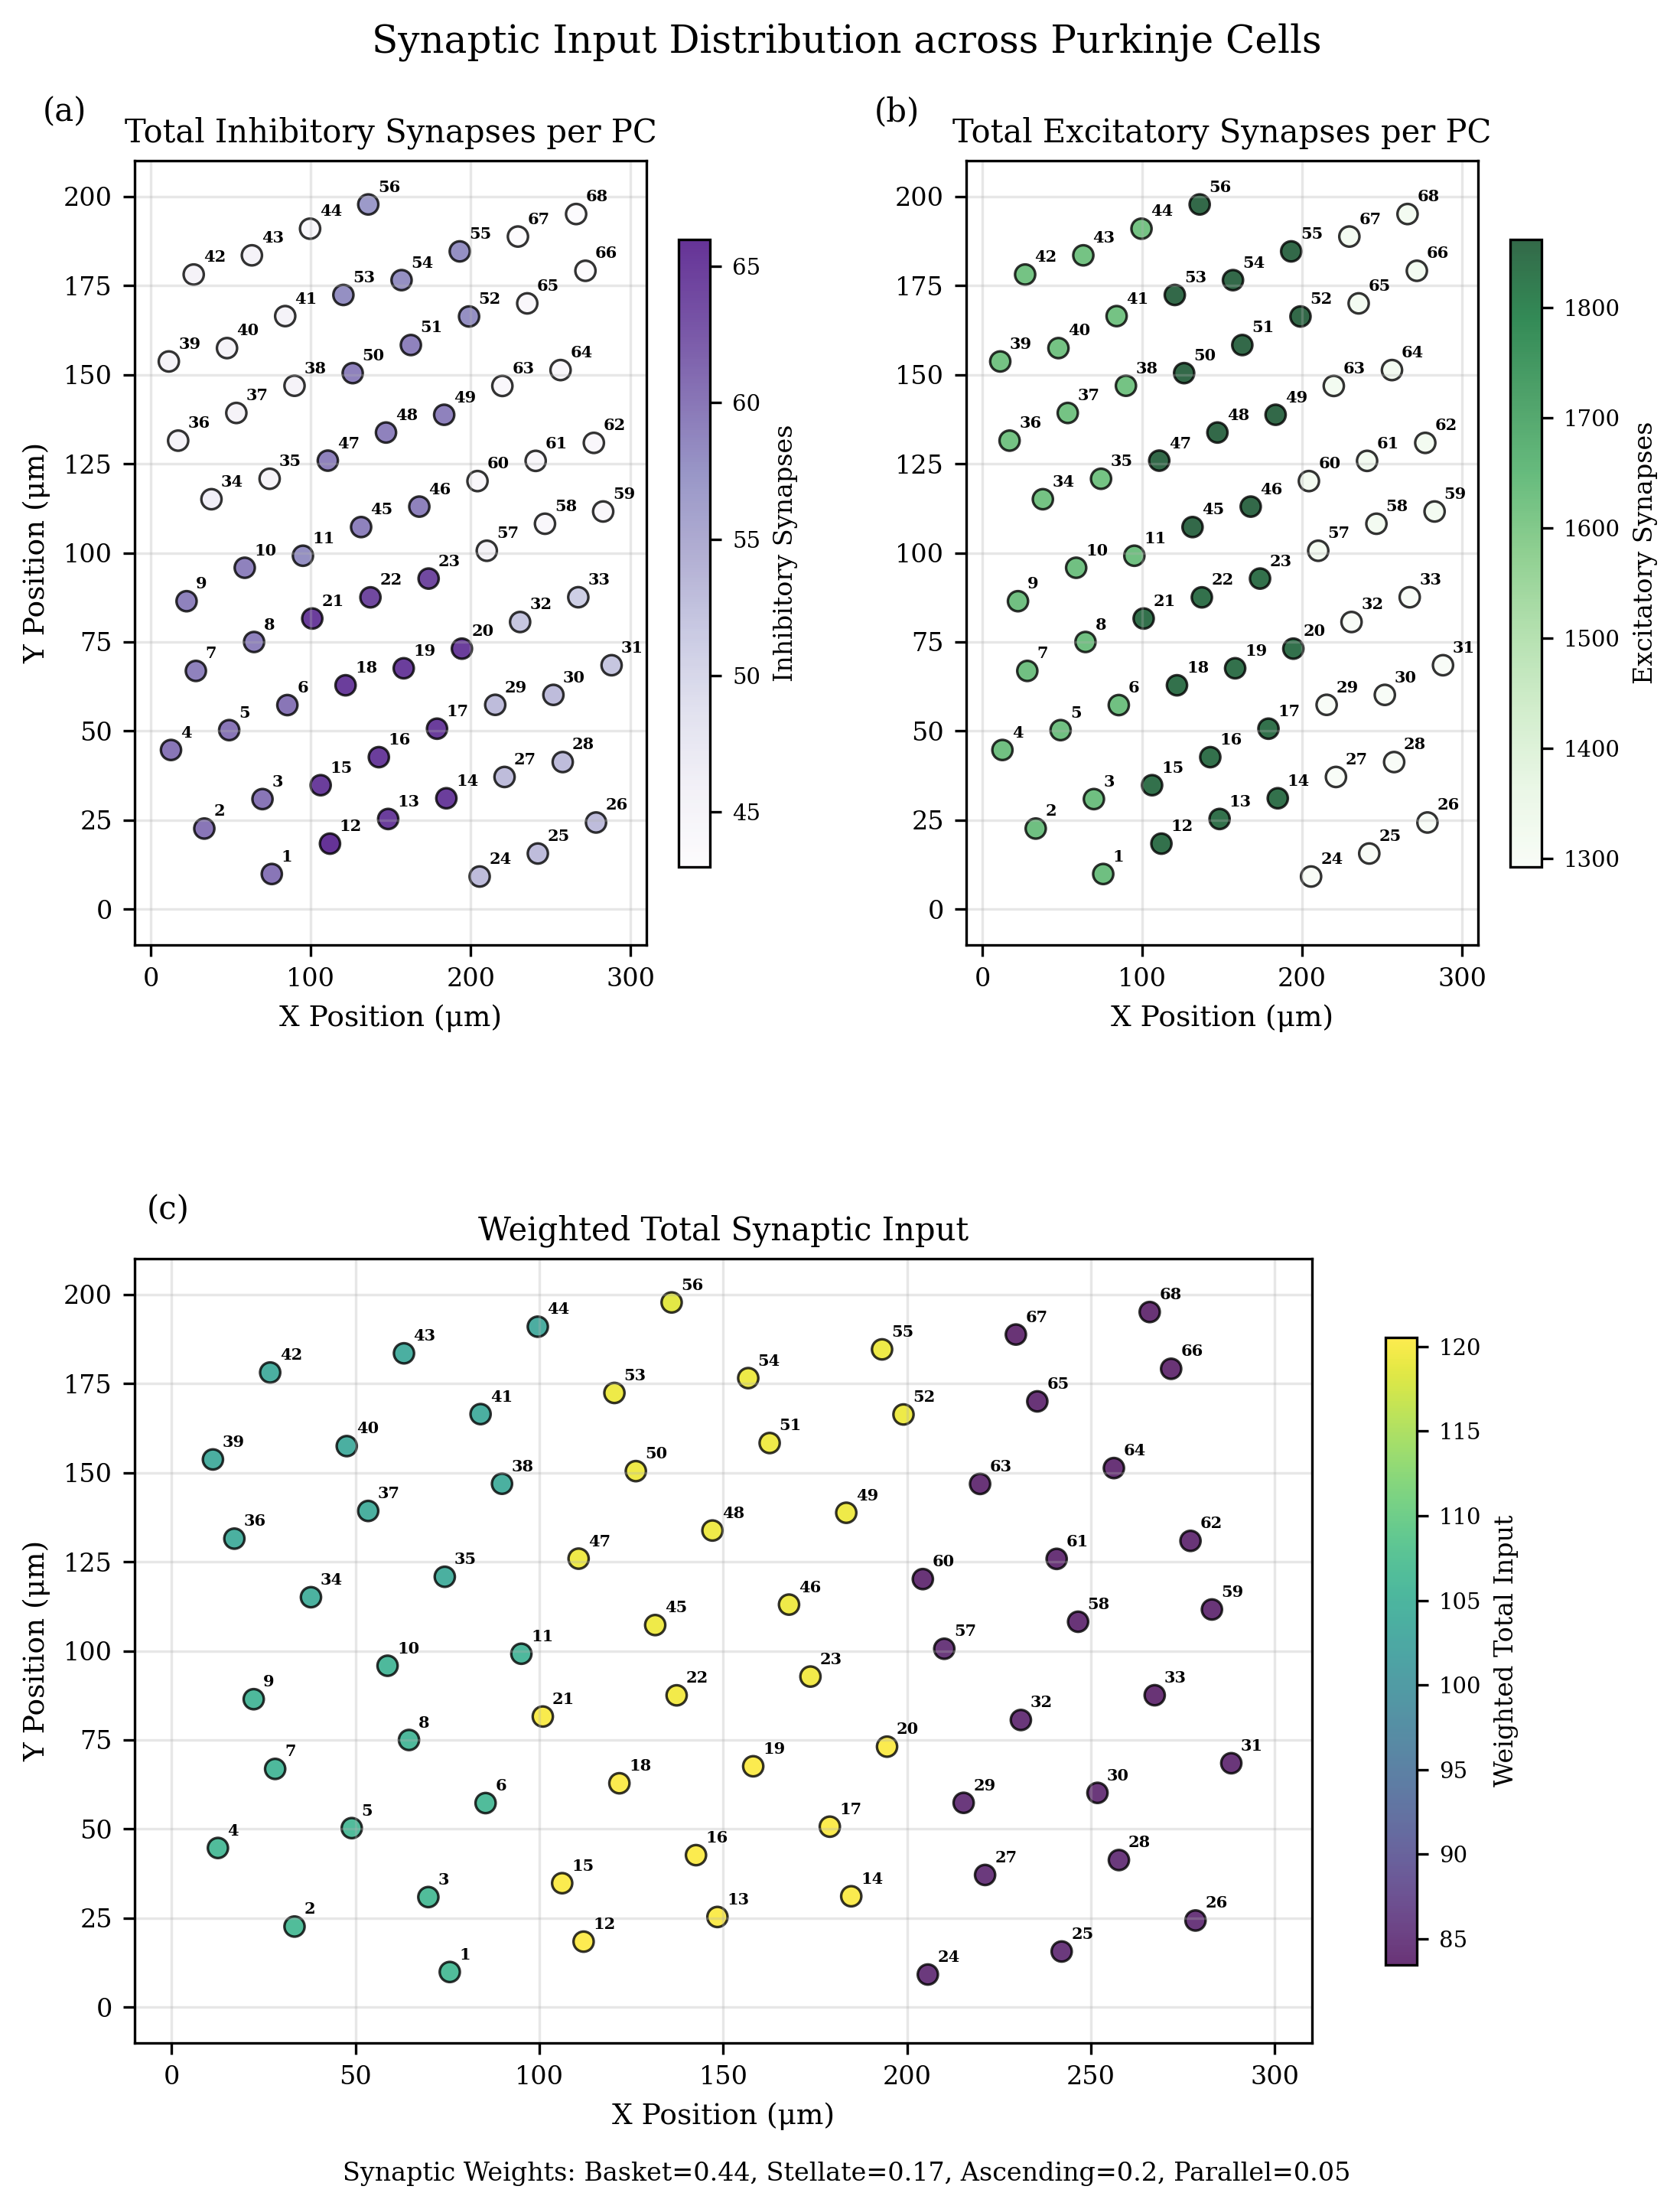


Synaptic Input Summary:
Total Inhibitory Synapses - Mean: 54.1, Range: 43.0-66.0
Total Excitatory Synapses - Mean: 1603.9, Range: 1293.0-1862.0
Weighted Total Input - Mean: 103.4, Range: 83.5-120.6


In [46]:
weighted_inh, weighted_exc, weighted_total, total_exc, total_inh = plot_per_cell_density(pc_positions_realistic, pc_actual_ids, synapse_counts, synapse_details, show_ids=True)

In [48]:
len(total_exc)

68

In [54]:
synapse_details_df = pd.DataFrame({
    'cell_id': pc_actual_ids,
    'stellate_synapses': [synapse_details[i]['stellate'] for i in synapse_details.keys()],
    'basket_synapses': [synapse_details[i]['basket'] for i in synapse_details.keys()],
    'total_inh_synapses': total_inh,
    'total_exc_synapses': total_exc,
    'total_weighted_synapses': weighted_total
})


In [52]:
synapse_details_df

,cell_id,stellate_synapses,basket_synapses,total_inh_synapses,total_exc_synapses,total_weighted_synapses
0,1,49,11,60,1634,106.42
1,2,49,11,60,1634,106.42
2,3,49,11,60,1634,106.42
3,4,49,11,60,1633,106.22
4,5,49,11,60,1633,106.22
...,...,...,...,...,...,...
63,64,38,6,44,1319,83.75
64,65,38,6,44,1319,83.75
65,66,37,6,43,1319,83.58
66,67,37,6,43,1319,83.58


In [55]:
synapse_details_df.to_csv("/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/synapse_details.csv", index=False)

In [8]:
with h5py.File(FILE_NAME, 'r') as f:
    print("Top-level groups:")
    for key in f.keys():
        print(f"  {key}")

Top-level groups:
  connectivity
  files
  morphologies
  morphology_meta
  placement


In [9]:
def explore_hdf5_structure(h5_file):
    """
    Explore the HDF5 file structure to find synaptic density data
    """
    with h5py.File(h5_file, 'r') as f:
        print("Top-level groups:")
        for key in f.keys():
            print(f"  {key}")
            
        # Check for connectivity-related groups
        if 'connectivity' in f:
            print("\nConnectivity groups:")
            for key in f['connectivity'].keys():
                print(f"  connectivity/{key}")
                
        # Check for synaptic density specific keys
        possible_keys = ['synaptic_density', 'synapse_density', 'density', 'synapses']
        for key in possible_keys:
            if key in f:
                print(f"\nFound potential synaptic data: {key}")
                
        # Check placement groups for additional data
        if 'placement' in f:
            print("\nPlacement group structure:")
            for cell_type in f['placement'].keys():
                print(f"  placement/{cell_type}")
                if cell_type == 'purkinje_cell':
                    for chunk_id in f['placement'][cell_type].keys():
                        chunk_group = f['placement'][cell_type][chunk_id]
                        print(f"    Available data types: {list(chunk_group.keys())}")
                        break  # Just show first chunk

explore_hdf5_structure(FILE_NAME)


Top-level groups:
  connectivity
  files
  morphologies
  morphology_meta
  placement

Connectivity groups:
  connectivity/ascending_axon_to_golgi
  connectivity/ascending_axon_to_purkinje
  connectivity/basket_to_basket
  connectivity/basket_to_purkinje
  connectivity/gap_goc
  connectivity/glomerulus_to_golgi
  connectivity/glomerulus_to_granule
  connectivity/golgi_to_glomerulus
  connectivity/golgi_to_golgi
  connectivity/mossy_fibers_to_glomerulus
  connectivity/parallel_fiber_to_basket
  connectivity/parallel_fiber_to_golgi
  connectivity/parallel_fiber_to_purkinje
  connectivity/parallel_fiber_to_stellate
  connectivity/stellate_to_purkinje
  connectivity/stellate_to_stellate

Placement group structure:
  placement/basket_cell
  placement/glomerulus
  placement/golgi_cell
  placement/granule_cell
  placement/mossy_fibers
  placement/purkinje_cell
    Available data types: ['additional', 'labels', 'morphology', 'position', 'rotation']
  placement/stellate_cell


In [99]:
cells_positions.head()

,x,y,z,cell_type,cell_id
0,75.622307,9.909550,137.5,purkinje_cell,0
1,33.403757,22.655929,137.5,purkinje_cell,1
2,69.794482,30.924364,137.5,purkinje_cell,2
3,12.575932,44.695208,137.5,purkinje_cell,3
4,48.966657,50.266964,137.5,purkinje_cell,4


In [18]:
def visualize_3d_cells(cell_data, color_by=None, palette=None, add_annotations=True):
    # Network dimensions
    x_size = 300.0
    y_size = 200.0
    z_size = 295.0

    # Layer thicknesses
    granular_layer = 130.0
    purkinje_layer = 15.0 # Purkinje cells layer / parallel placement
    b_molecular_layer = 50.0  # basket cells layer / random placement
    t_molecular_layer = 100.0  # stellate cells layer / random placement

    # Connectivity matrices (separate for basket and stellate)
    # pass 

    # Extract positions (fix the data access)
    PC_df = cell_data['cell_type'] == 'purkinje_cell'
    positionsPC = cell_data[PC_df][['x', 'y', 'z']].values
    # cell_id_PC = cell_data[PC_df]['cell_id']
    positionsBK = cell_data[cell_data['cell_type'] == 'basket_cell'][['x', 'y', 'z']].values
    positionsSC = cell_data[cell_data['cell_type'] == 'stellate_cell'][['x', 'y', 'z']].values

    # Create 3D plot (fix the subplot creation)
    fig = plt.figure(figsize=(15, 12), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Plot Purkinje cells
    ax.scatter(positionsPC[:, 0], positionsPC[:, 1], positionsPC[:, 2],
               c='blue', s=120, marker='s', label=f'Purkinje cells ({len(positionsPC)})', 
               alpha=0.9)
    
    


    # Plot Basket cells (green triangles, medium)
    ax.scatter(positionsBK[:, 0], positionsBK[:, 1], positionsBK[:, 2],
               c='red', s=60, marker='^', label=f'Basket cells ({len(positionsBK)})', 
               alpha=0.8)

    # Plot Stellate cells (blue circles, smaller)
    ax.scatter(positionsSC[:, 0], positionsSC[:, 1], positionsSC[:, 2],
               c='green', s=30, marker='o', label=f'Stellate cells ({len(positionsSC)})', 
               alpha=0.7)
    
    if add_annotations and 'cell_id' in cell_data[PC_df].columns:
            for idx, row in cell_data[PC_df].iterrows():
                ax.text(row['x'], row['y'], row['z'],
                       str(row['cell_id']), fontsize=5, color='white', fontweight='bold')

    # Add layer boundaries as reference planes
    z_layers = [
        granular_layer,  # Top of granular layer
        granular_layer + purkinje_layer,  # Top of Purkinje layer
        granular_layer + purkinje_layer + b_molecular_layer,  # Top of basket layer
        granular_layer + purkinje_layer + b_molecular_layer + t_molecular_layer  # Top of network
    ]
    
    layer_names = ['Granular', 'Purkinje', 'Basket', 'Stellate']
    
    # Add subtle layer planes
    xx, yy = np.meshgrid(np.linspace(0, x_size, 10), np.linspace(0, y_size, 10))
    for i, (z_pos, layer_name) in enumerate(zip(z_layers, layer_names)):
        zz = np.ones_like(xx) * z_pos
        ax.plot_surface(xx, yy, zz, alpha=0.1, color='gray')

    # Formatting
    ax.set_xlabel('X Position (μm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y Position (μm)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Z Position (μm)', fontsize=12, fontweight='bold')
    ax.set_title('3D Network\nMolecular Layer Interneurons → Purkinje Cells', 
                 fontsize=14, fontweight='bold', pad=20)

    # Set equal aspect ratio
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size) 
    ax.set_zlim(0, z_size)

    # Legend
    legend = ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
    legend.get_frame().set_facecolor('white')

    # Add network statistics
    stats_text = f"""Network Statistics:
Total cells: {len(positionsPC) + len(positionsBK) + len(positionsSC)}
Volume: {x_size}×{y_size}×{z_size} μm³"""
    
    ax.text2D(0.02, 0.02, stats_text, transform=ax.transAxes, 
              fontsize=9, verticalalignment='bottom',
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()
    
    return fig, ax


In [35]:
def extract_positions_simple(h5_file):
    """
    Extract positions and create simple dataframe with cell IDs
    """
    all_data = []
    
    with h5py.File(h5_file, 'r') as f:
        for cell_type in ['purkinje_cell', 'stellate_cell', 'basket_cell', 'mossy_fibers']:
            placement_path = f'placement/{cell_type}'
            if placement_path in f:
                cell_group = f[placement_path]
                cell_positions = []
                
                # Extract positions from all chunks
                for chunk_id in cell_group.keys():
                    if 'position' in cell_group[chunk_id]:
                        positions = cell_group[chunk_id]['position'][:]
                        cell_positions.append(positions)
                
                # Combine all chunks for this cell type
                if cell_positions:
                    all_positions = np.vstack(cell_positions)
                    n_cells = len(all_positions)
                    
                    # Create dataframe for this cell type
                    df_chunk = pd.DataFrame({
                        'x': all_positions[:, 0],
                        'y': all_positions[:, 1],
                        'z': all_positions[:, 2],
                        'cell_type': [cell_type] * n_cells,
                        'cell_id': np.arange(n_cells) + 1
                    })
                    all_data.append(df_chunk)
    
    # Combine all cell types
    positions_df = pd.concat(all_data, ignore_index=True)
    
    print(f"Extracted positions for {len(positions_df)} cells:")
    for cell_type in positions_df['cell_type'].unique():
        count = len(positions_df[positions_df['cell_type'] == cell_type])
        print(f"  {cell_type}: {count}")
    
    return positions_df

positions_df = extract_positions_simple(FILE_NAME)

Extracted positions for 633 cells:
  purkinje_cell: 68
  stellate_cell: 300
  basket_cell: 150
  mossy_fibers: 115


In [36]:
positions_df

,x,y,z,cell_type,cell_id
0,75.622307,9.909550,137.500000,purkinje_cell,1
1,33.403757,22.655929,137.500000,purkinje_cell,2
2,69.794482,30.924364,137.500000,purkinje_cell,3
3,12.575932,44.695208,137.500000,purkinje_cell,4
4,48.966657,50.266964,137.500000,purkinje_cell,5
...,...,...,...,...,...
628,207.989268,136.380795,30.580945,mossy_fibers,111
629,289.994258,185.203065,88.007248,mossy_fibers,112
630,290.408362,177.989647,13.714048,mossy_fibers,113
631,201.873249,101.816053,18.810728,mossy_fibers,114


In [12]:
positions_df.to_csv('cell_positions.csv', index=False)

In [35]:
def get_cell_ids(h5_file, cell_name):
    """
    Get cell IDs from placement data
    """
    cell_info = {}

    with h5py.File(h5_file, 'r') as f:
        placement_path = f'placement/{cell_name}'
        if placement_path in f:
            cell_group = f[placement_path]

            for chunk_id in cell_group.keys():
                print(chunk_id)
                chunk = cell_group[chunk_id]
                if 'position' in chunk:
                    positions = chunk['position'][:]
                    cell_info[chunk_id] = {
                        'positions': positions,
                        'n_cells': len(positions)
                    }
                    print(f"  Chunk {chunk_id}: {len(positions)} cells")
    return cell_info

mossy_positions_chunk = get_cell_ids(FILE_NAME, 'mossy_fibers')
glom_positions_chunk = get_cell_ids(FILE_NAME, 'glomerulus')
granule_positions_chunk = get_cell_ids(FILE_NAME, 'granule_cell')

0
  Chunk 0: 15 cells
1
  Chunk 1: 15 cells
2
  Chunk 2: 15 cells
4294967296
  Chunk 4294967296: 4 cells
4294967297
  Chunk 4294967297: 4 cells
4294967298
  Chunk 4294967298: 5 cells
4295032832
  Chunk 4295032832: 4 cells
4295032833
  Chunk 4295032833: 4 cells
4295032834
  Chunk 4295032834: 4 cells
65536
  Chunk 65536: 15 cells
65537
  Chunk 65537: 15 cells
65538
  Chunk 65538: 15 cells
0
  Chunk 0: 300 cells
1
  Chunk 1: 300 cells
2
  Chunk 2: 300 cells
4294967296
  Chunk 4294967296: 90 cells
4294967297
  Chunk 4294967297: 90 cells
4294967298
  Chunk 4294967298: 90 cells
4295032832
  Chunk 4295032832: 90 cells
4295032833
  Chunk 4295032833: 90 cells
4295032834
  Chunk 4295032834: 90 cells
65536
  Chunk 65536: 300 cells
65537
  Chunk 65537: 300 cells
65538
  Chunk 65538: 300 cells
0
  Chunk 0: 3900 cells
1
  Chunk 1: 3900 cells
2
  Chunk 2: 3900 cells
4294967296
  Chunk 4294967296: 1170 cells
4294967297
  Chunk 4294967297: 1170 cells
4294967298
  Chunk 4294967298: 1170 cells
4295032832

In [56]:
mf_to_glom_connectivity = connectivity_mf_glom['mossy_fibers_to_glomerulus']
glom_to_granule_connectivity = connectivity_mf_glom['glomerulus_to_granule']
pf_to_purkinje_connectivity = connectivity_chunks['parallel_fiber_to_purkinje']
aa_to_purkinje_connectivity = connectivity_chunks['ascending_axon_to_purkinje']

In [95]:
# Step 5: Granule cells → Purkinje cells (parallel fibers + ascending axons)
pf_target = find_target_chunks(stimulated_granule_cells, pf_to_purkinje_connectivity)
aa_target = find_target_chunks(stimulated_granule_cells, aa_to_purkinje_connectivity)

Stimulated  chunks: {'65536', '1', '0', '4295032834', '2', '4294967296', '4294967297', '4295032833', '4295032832', '65537', '65538', '4294967298'}
Available target chunks in connectivity: {'4295032834', '4294967296', '4294967297', '4295032833', '4295032832', '4294967298'}
Target chunk 4294967296: 17125 synapses
Target chunk 4294967297: 21038 synapses
Target chunk 4294967298: 12369 synapses
Target chunk 4295032832: 16961 synapses
Target chunk 4295032833: 21243 synapses
Target chunk 4295032834: 15132 synapses
Stimulated  chunks: {'65536', '1', '0', '4295032834', '2', '4294967296', '4294967297', '4295032833', '4295032832', '65537', '65538', '4294967298'}
Available target chunks in connectivity: {'4295032834', '4294967296', '4294967297', '4295032833', '4295032832', '4294967298'}
Target chunk 4294967296: 839 synapses
Target chunk 4294967297: 1101 synapses
Target chunk 4294967298: 576 synapses
Target chunk 4295032832: 896 synapses
Target chunk 4295032833: 1091 synapses
Target chunk 429503283

In [97]:
def trace_specific_connections(stimulated_source_chunks, connectivity_data, target_positions_chunk, connection_name=""):
    """
    Trace connections from specific stimulated cells to their target cells
    """
    stimulated_targets = {}
    target_positions = []
    
    print(f"\n=== Tracing {connection_name} ===")
    
    for source_chunk_id, source_data in stimulated_source_chunks.items():
        print(f"Source chunk {source_chunk_id}: {source_data.get('n_cells', len(source_data.get('positions', [])))} stimulated cells")
        
        # Find which target chunks this source chunk connects to
        for target_chunk_id, synapse_data in connectivity_data['chunk_to_synapses'].items():
            n_synapses = synapse_data['n_synapses']
            
            if n_synapses > 0 and target_chunk_id in target_positions_chunk:
                # Get target chunk info
                target_chunk_info = target_positions_chunk[target_chunk_id]
                target_chunk_positions = target_chunk_info['positions']
                n_target_cells = len(target_chunk_positions)
                
                # Calculate how many target cells are affected
                # Assume each stimulated source cell affects a proportional number of targets
                n_source_cells = source_data.get('n_cells', len(source_data.get('positions', [])))
                
                # Simple model: each source affects multiple targets, but only some targets are affected
                affected_fraction = min(1.0, n_synapses / (n_source_cells * n_target_cells))
                n_affected_targets = max(1, int(n_target_cells * affected_fraction))
                
                # Select subset of target cells (you could make this more sophisticated)
                affected_indices = np.random.choice(n_target_cells, 
                                                  size=min(n_affected_targets, n_target_cells), 
                                                  replace=False)
                
                affected_positions = target_chunk_positions[affected_indices]
                
                stimulated_targets[target_chunk_id] = {
                    'positions': affected_positions,
                    'n_cells': len(affected_positions),
                    'source_chunk': source_chunk_id
                }
                
                target_positions.extend(affected_positions)
                
                print(f"  → Target chunk {target_chunk_id}: {len(affected_positions)}/{n_target_cells} cells affected")
    
    return stimulated_targets, np.array(target_positions) if target_positions else np.array([]).reshape(0, 3)

In [98]:
# Step 1: Mossy fibers → Glomeruli (keep as is)
glom_target = find_target_chunks(mossy_stimulated_chunks, mf_to_glom_connectivity, "MF to Glomeruli")
stimulated_glomeruli = find_stimulated_in_chunks(glom_target, glom_positions_chunk)

# Step 2: Glomeruli → Granule cells (keep as is)  
granule_target = find_target_chunks(stimulated_glomeruli, glom_to_granule_connectivity, "Glomeruli to Granule")
stimulated_granule_cells = find_stimulated_in_chunks(granule_target, granule_positions_chunk)

# Step 3: Granule cells → Purkinje cells (IMPROVED - trace specific connections)
stimulated_pc_from_pf, stimulated_pc_pos_pf = trace_specific_connections(
    stimulated_granule_cells, pf_to_purkinje_connectivity, pc_info, "Parallel Fiber → Purkinje"
)

stimulated_pc_from_aa, stimulated_pc_pos_aa = trace_specific_connections(
    stimulated_granule_cells, aa_to_purkinje_connectivity, pc_info, "Ascending Axon → Purkinje"
)

# Combine PF and AA targets (remove duplicates)
all_stimulated_pc_pos = np.vstack([stimulated_pc_pos_pf, stimulated_pc_pos_aa]) if len(stimulated_pc_pos_pf) > 0 and len(stimulated_pc_pos_aa) > 0 else (stimulated_pc_pos_pf if len(stimulated_pc_pos_pf) > 0 else stimulated_pc_pos_aa)

# Remove duplicate positions (if any PC receives both PF and AA input)
if len(all_stimulated_pc_pos) > 0:
    unique_pc_pos = np.unique(all_stimulated_pc_pos, axis=0)
else:
    unique_pc_pos = np.array([]).reshape(0, 3)

print(f"\nFinal stimulated Purkinje cells: {len(unique_pc_pos)} cells")
print(f"  From parallel fibers: {len(stimulated_pc_pos_pf)} cells")
print(f"  From ascending axons: {len(stimulated_pc_pos_aa)} cells")

Stimulated MF to Glomeruli chunks: {'65536', '1', '0', '4295032834', '2', '4294967296', '4294967297', '4295032833', '65537', '4294967298'}
Available target chunks in connectivity: {'65536', '1', '0', '4295032834', '2', '4294967296', '4294967297', '4295032833', '4295032832', '65537', '65538', '4294967298'}
Target chunk 0: 297 synapses
Target chunk 1: 300 synapses
Target chunk 2: 300 synapses
Target chunk 4294967296: 90 synapses
Target chunk 4294967297: 90 synapses
Target chunk 4294967298: 90 synapses
Target chunk 4295032832: 90 synapses
Target chunk 4295032833: 90 synapses
Target chunk 4295032834: 90 synapses
Target chunk 65536: 300 synapses
Target chunk 65537: 300 synapses
Target chunk 65538: 300 synapses
Chunk 0: 297 synapses → 300 cells
  ~0 synapses per cell
Chunk 1: 300 synapses → 300 cells
  ~1 synapses per cell
Chunk 2: 300 synapses → 300 cells
  ~1 synapses per cell
Chunk 4294967296: 90 synapses → 90 cells
  ~1 synapses per cell
Chunk 4294967297: 90 synapses → 90 cells
  ~1 syna

In [ ]:
def visualize_3d_cells_with_stimulus(cell_data, stimulus_center=[150, 65, 100], radius=90, 
                                   add_annotations=True):
    """
    Enhanced 3D visualization showing stimulus propagation with PC cell IDs
    """
    # Network dimensions
    x_size = 300.0
    y_size = 200.0
    z_size = 295.0

    granular_layer = 130.0
    purkinje_layer = 15.0
    b_molecular_layer = 50.0
    t_molecular_layer = 100.0

    PC_df = cell_data['cell_type'] == 'purkinje_cell'
    positionsPC = cell_data[PC_df][['x', 'y', 'z']].values
    positionsBK = cell_data[cell_data['cell_type'] == 'basket_cell'][['x', 'y', 'z']].values
    positionsSC = cell_data[cell_data['cell_type'] == 'stellate_cell'][['x', 'y', 'z']].values
    
    mossy_df = cell_data['cell_type'] == 'mossy_fibers'
    positionsMF = cell_data[mossy_df][['x', 'y', 'z']].values

    fig = plt.figure(figsize=(8.27, 12), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(positionsPC[:, 0], positionsPC[:, 1], positionsPC[:, 2],
               c='lightblue', edgecolors='darkblue', s=100, marker='s', label=f'Purkinje cells ({len(positionsPC)})',
               alpha=0.8)

    
    ax.scatter(positionsBK[:, 0], positionsBK[:, 1], positionsBK[:, 2],
               c='lightcoral', s=60, marker='^', label=f'Basket cells ({len(positionsBK)})', 
               alpha=0.6, edgecolors='darkred', linewidth=1)

    ax.scatter(positionsSC[:, 0], positionsSC[:, 1], positionsSC[:, 2],
               c='lightgreen', s=30, marker='o', label=f'Stellate cells ({len(positionsSC)})', 
               alpha=0.6, edgecolors='darkgreen', linewidth=1)
    

    if add_annotations and 'cell_id' in cell_data[PC_df].columns:
        for idx, row in cell_data[PC_df].iterrows():
            ax.text(row['x'], row['y'], row['z'],
                str(row['cell_id']), 
                fontsize=8,          
                color='black',       
                fontweight='bold',
                ha='left', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))


    if stimulus_center and radius:
        u = np.linspace(0, 2 * np.pi, 20)
        v = np.linspace(0, np.pi, 20)
        x_sphere = radius * np.outer(np.cos(u), np.sin(v)) + stimulus_center[0]
        y_sphere = radius * np.outer(np.sin(u), np.sin(v)) + stimulus_center[1]
        z_sphere = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + stimulus_center[2]
        
        ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='red')
        
        ax.scatter(*stimulus_center, c='red', s=200, marker='X', 
                  label=f'Stimulus Center (r={radius}μm)', alpha=1.0, edgecolors='darkred', linewidth=2)
    z_layers = [
        granular_layer,
        granular_layer + purkinje_layer,
        granular_layer + purkinje_layer + b_molecular_layer,
        granular_layer + purkinje_layer + b_molecular_layer + t_molecular_layer
    ]
    

    xx, yy = np.meshgrid(np.linspace(0, x_size, 10), np.linspace(0, y_size, 10))
    for i, z_pos in enumerate(z_layers):
        zz = np.ones_like(xx) * z_pos
        ax.plot_surface(xx, yy, zz, alpha=0.05, color='gray')

    ax.set_xlabel('X Position (μm)', fontsize=12)
    ax.set_ylabel('Y Position (μm)', fontsize=12)
    ax.set_zlabel('Z Position (μm)', fontsize=12)
    ax.set_title('3D Cerebellar Network: Complete Architecture\nwith Burst Stimulus Location', 
                 fontsize=14, pad=20)

    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size) 
    ax.set_zlim(0, z_size)

    legend = ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
    legend.get_frame().set_facecolor('white')

    total_cells = len(positionsPC) + len(positionsBK) + len(positionsSC)
    stimulated_mf_count = len(stimulated_mossy_pos) if 'stimulated_mossy_pos' in globals() else 0
    
    stats_text = f"""Network Statistics:
        Total cells: {total_cells:,}
        • Purkinje cells: {len(positionsPC)}
        • Basket cells: {len(positionsBK)}
        • Stellate cells: {len(positionsSC)}

        Burst Stimulus Parameters:
        • Center: {stimulus_center}
        • Radius: {radius}μm

        Volume: {x_size}×{y_size}×{z_size} μm³"""
    
    ax.text2D(0.02, 0.02, stats_text, transform=ax.transAxes, 
              fontsize=6, verticalalignment='bottom')

    plt.tight_layout()
    plt.show()
    
    return fig, ax

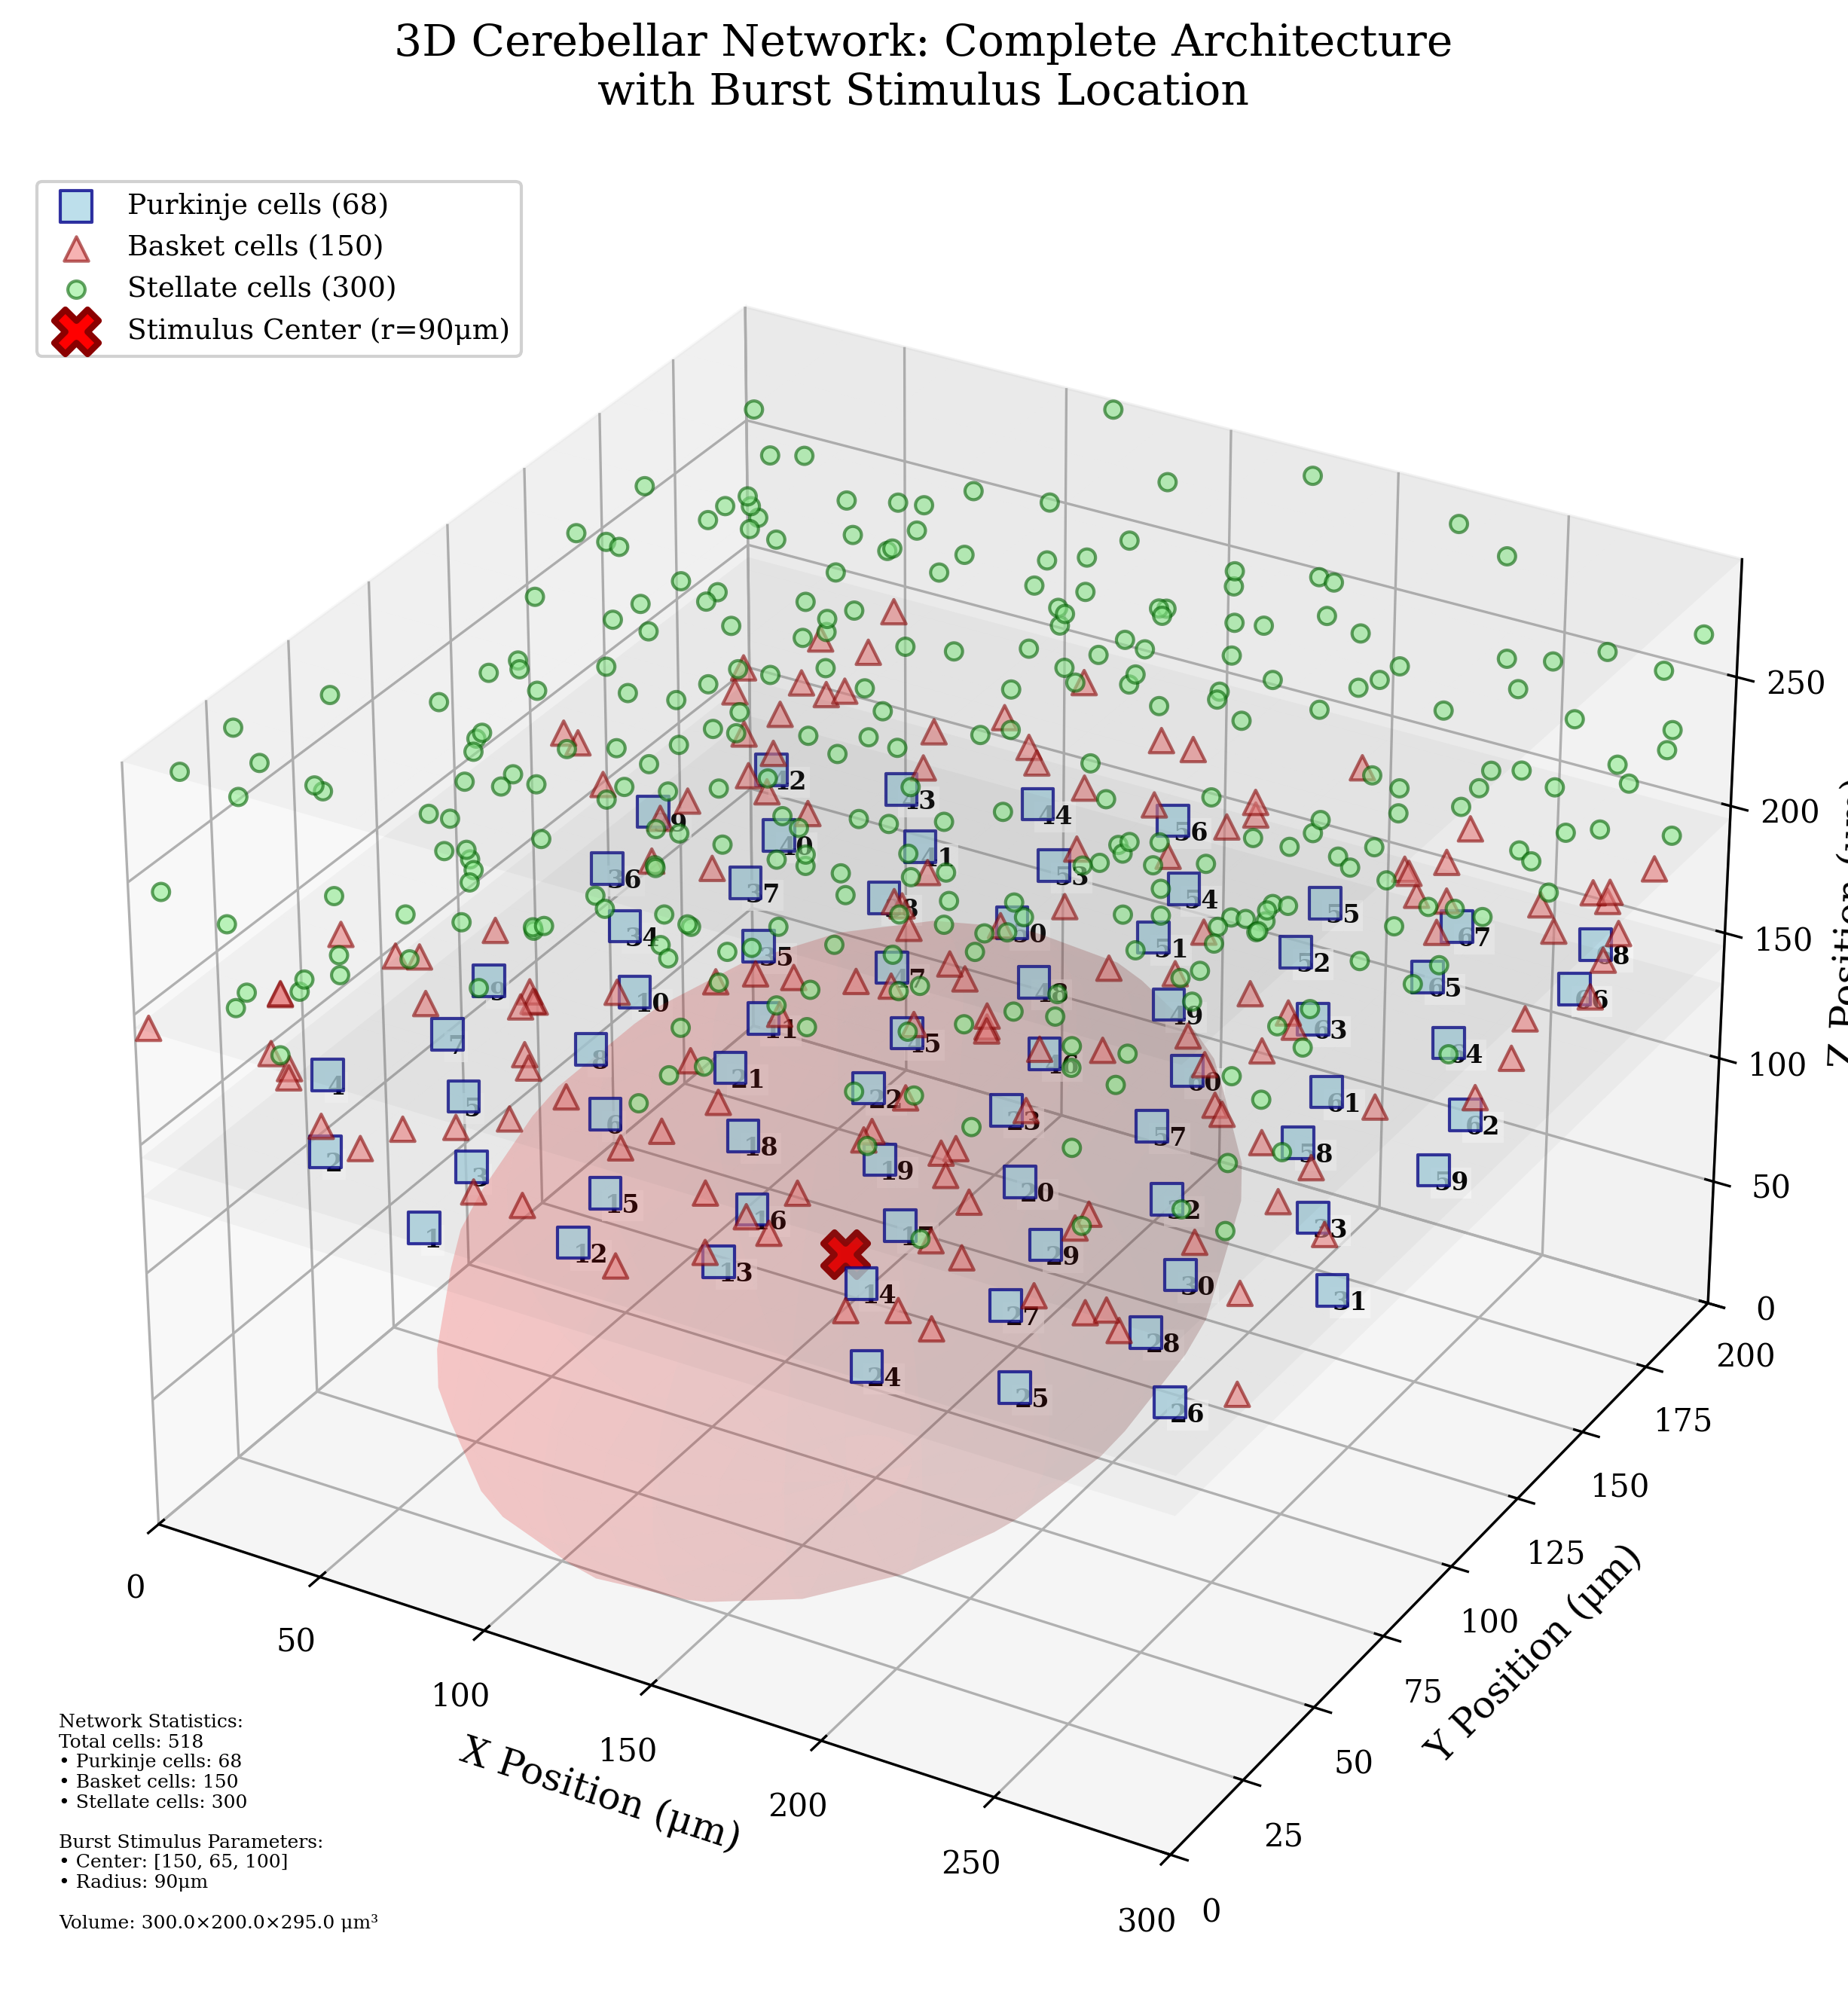

In [44]:
fig, ax = visualize_3d_cells_with_stimulus(
    positions_df,
    stimulus_center=[150, 65, 100],
    radius=90,
    add_annotations=True
)